In [1]:
# For visualization
from helper_draw.draw_graph import draw_dot
# For functionality
from value import Value
from neural_net import Neuron, Layer, MLP

<h3> Initial Testing </h3>

Implementation of:
    <ul>
    <li> Addition </li>
    <li> Multiplication </li>
    <li> Children </li>
    <li> Calculating Gradients </li>
    </ul>

In [2]:
a = Value(6, 'a')
print(a)
b = Value(8, 'b')
print(b)

Value(data:6, label:a)
Value(data:8, label:b)


In [3]:
c = a+b
c.label = 'c'
print(c)

d = Value(data = 3, label = 'd')
print(d)

e = d*c
e.label = 'e'
print(e)

Value(data:14, label:c)
Value(data:3, label:d)
Value(data:42, label:e)


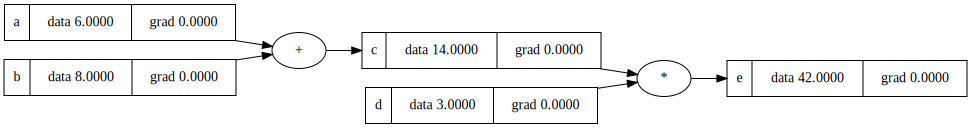

In [4]:
draw_dot(e)

<h3> Neuron Basic Testing </h3>

In [5]:
# Using the same values as the learning resource to verify output values

# Inputs
x1 = Value(data = 2, label = 'x1')
x2 = Value(data = 0, label = 'x2')

# Weights
w1 = Value(data = -3, label = 'w1')
w2 = Value(data = 1, label = 'w2')

# Bias
b = Value(data = 6.8813735870195432, label = 'b')

xw1 = x1 * w1
xw1.label = 'xw1'

xw2 = x2 * w2
xw2.label = 'xw2'

xw1xw2 = xw1 + xw2
xw1xw2.label = 'xw1 + xw2'

o = xw1xw2 + b
o.label = 'o'

oa = o.tanh()
oa.label = 'oa'

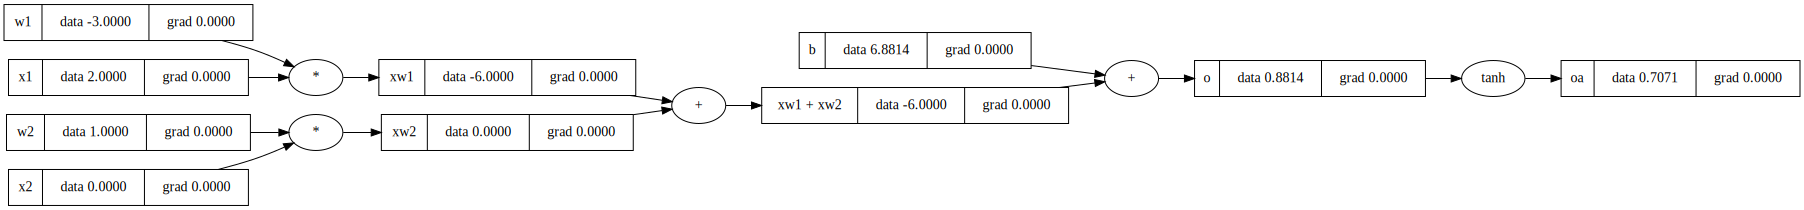

In [6]:
draw_dot(oa)

In [7]:
oa.back_prop()

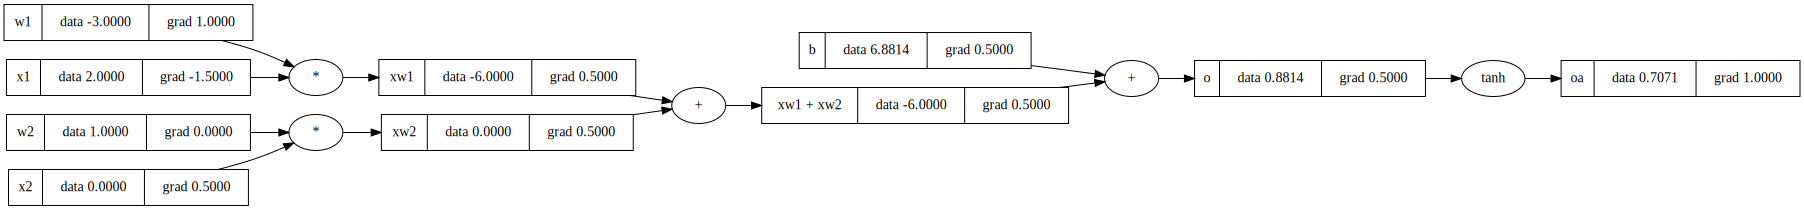

In [8]:
draw_dot(oa)

<h3> Adding More Functionality </h3>

In [9]:
# Using the same values as the learning resource to verify output values

# Inputs
x1 = Value(data = 2, label = 'x1')
x2 = Value(data = 0, label = 'x2')

# Weights
w1 = Value(data = -3, label = 'w1')
w2 = Value(data = 1, label = 'w2')

# Bias
b = Value(data = 6.8813735870195432, label = 'b')

xw1 = x1 * w1
xw1.label = 'xw1'

xw2 = x2 * w2
xw2.label = 'xw2'

xw1xw2 = xw1 + xw2
xw1xw2.label = 'xw1 + xw2'

o = xw1xw2 + b
o.label = 'o'

# Spelled out calculation of tanh to test the newly implemented functions
e2x = (2 * o).exp()
e2x.label = 'e2x'
oa = (e2x - 1) / (e2x + 1)
oa.label = 'oa'

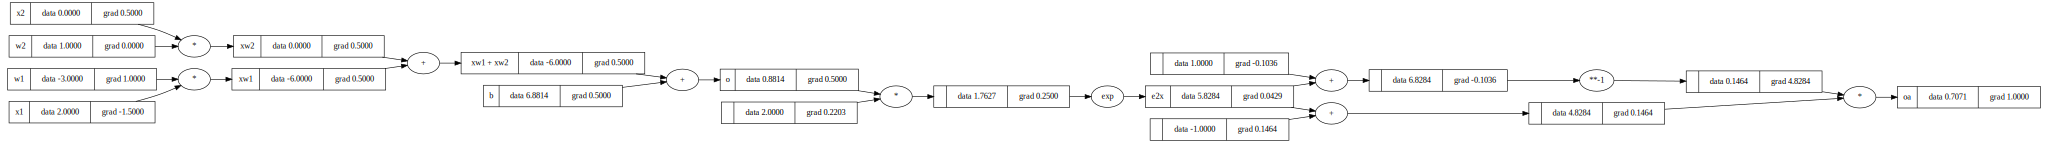

In [10]:
oa.back_prop()
draw_dot(oa)

### Torch Implementation

In [11]:
import torch

In [12]:
x1 = torch.Tensor([2.0]).double()
x1.requires_grad = True

x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double()
w1.requires_grad = True

w2 = torch.Tensor([1.0]).double()
w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double()
b.requires_grad = True

bef_ac = x1*w1 + x2*w2 + b
out = torch.tanh(bef_ac)

print('output data = ' + str(out.data.item()))
out.backward()

print('-------------------------------')

print('x1 grad = ' + str(x1.grad.item()))
print('w1 grad = ' + str(w1.grad.item()))

print('x2 grad = ' + str(x2.grad.item()))
print('w2 grad = ' + str(w2.grad.item()))

output data = 0.7071066904050358
-------------------------------
x1 grad = -1.5000003851533106
w1 grad = 1.0000002567688737
x2 grad = 0.5000001283844369
w2 grad = 0.0


### Multi Layer Perceptron (MLP) Testing

In [13]:
x = [3.0, 4.0, -2.0, -3.0]

# Neuron class testing
n = Neuron(4)
print(n(x))
print()

# Layer class testing
n = Layer(4,2)
print(n(x))
print()

# MLP Class Testing
mlp_model = MLP(4, [4, 3, 2, 1])
print(mlp_model(x))
print()

Value(data:-0.9999975625404148, label:)

[Value(data:0.9996167114408675, label:), Value(data:0.9490097414422857, label:)]

[Value(data:-0.8258381892413768, label:)]



In [14]:
# dataset and prediction using model
x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y = [1.0, -1.0, -1.0, 1.0]

mlp_model = MLP(3, [4, 4, 1])

y_pred = [mlp_model(xi) for xi in x]
y_pred

[[Value(data:0.3438623688681273, label:)],
 [Value(data:0.788516149025609, label:)],
 [Value(data:0.43099627876370683, label:)],
 [Value(data:0.40153432220937824, label:)]]

In [15]:
# Calculating loss using MSE
loss = sum([(y_gt - y_out[0])**2 for y_gt, y_out in zip(y, y_pred)])
loss

Value(data:6.035218123641704, label:)

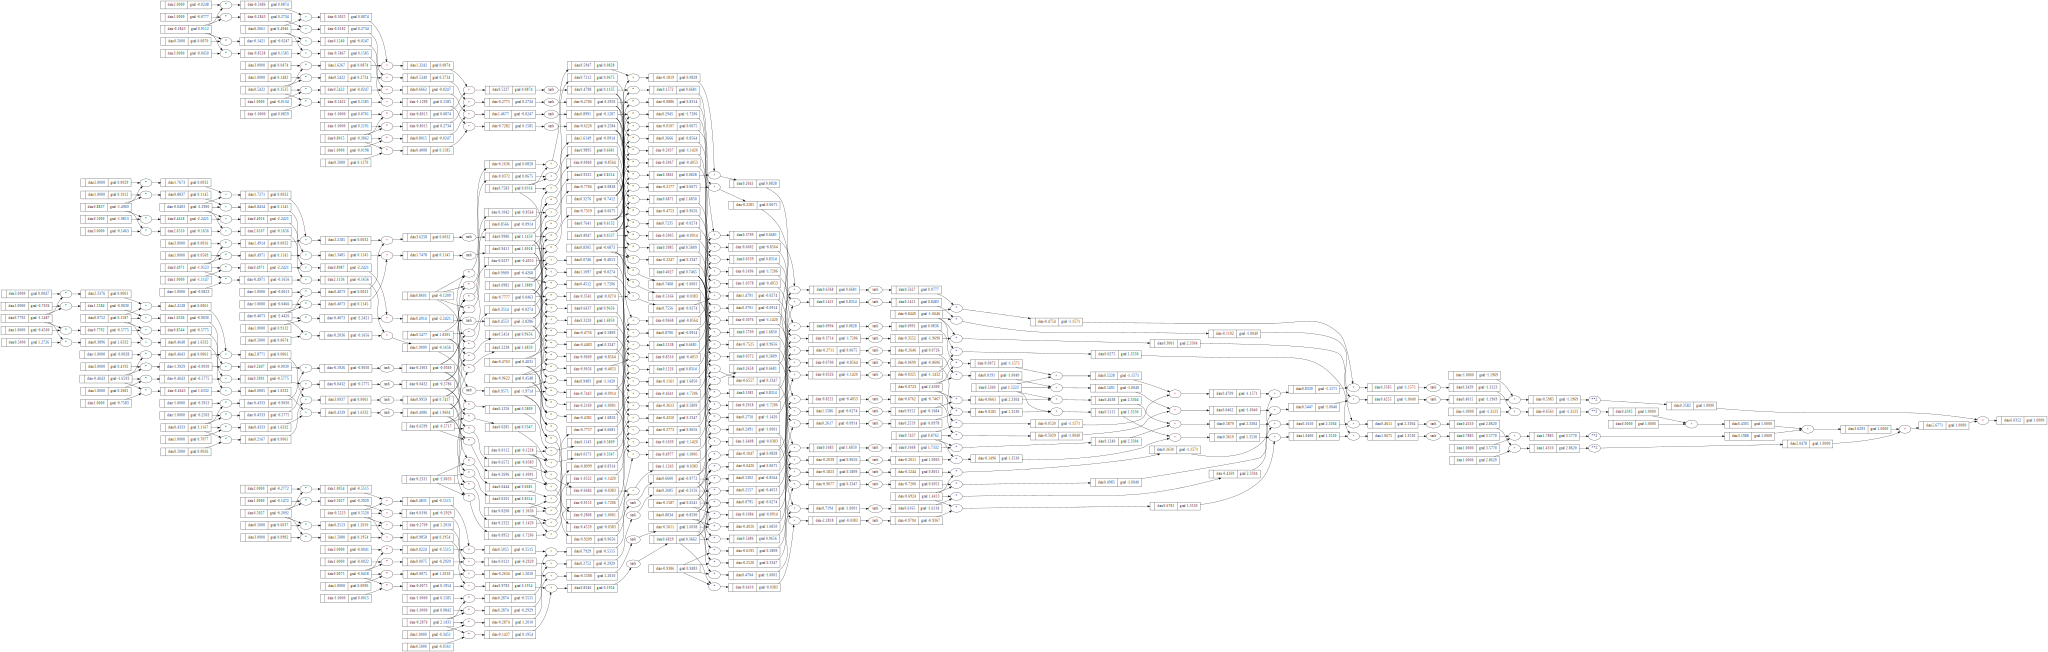

In [16]:
loss.back_prop()
draw_dot(loss)

In [17]:
len(mlp_model.parameters()) # Number of parameters to adjust

41

In [30]:
# Nudging the parameters
for p in mlp_model.parameters():
    p.data += 0.01 * -p.grad

# Prediction and loss calculation
y_pred = [mlp_model(xi) for xi in x]
loss = sum([(y_gt - y_out[0])**2 for y_gt, y_out in zip(y, y_pred)])
loss

Value(data:2.732974434847832, label:)

In [31]:
y_pred

[[Value(data:0.3909895679876914, label:)],
 [Value(data:0.43481957252727693, label:)],
 [Value(data:-0.9446734934234249, label:)],
 [Value(data:0.4519922441144766, label:)]]